# **OVERVIEW**

---



DQLab is an Self-Paced Online Data Learning Center for data practitioners who want to brush up theirs skills. This project is part of their curriculum in order to build analytical skills and apply it to industry real problems.

DQLab collaborates with Nelda Ampulembang Parenta, a Senior Data Analyst Logisly
, organize a project portfolio that aims to measure **sales performance** using **SQL** programming from a shop which name was disguised as **DQLab Sales Store**.

Since I have finished this project using SQL on their platform, I would like to do it again using python by implementing **pandas** library for **data exploratory**. I will also create a **data visualization** of the obtained data using **matplotlib** library.

# **DATASET**

The dataset contains transactions from **2009 to 2012** with total of **5499** data, including order status which is divided into **'Finished Orders'**, **'Returned Orders'** and **'Canceled Orders'**.

The dataset that has been provided and will be used in this project contains the following fields.

- **order_id** : unique order number
- **order_status** : status of the order
- **customer** : customer name
- **order_date** : date of the order
- **order_quantity** : the quantity on a particular order
- **sales** : sales generated on a particular order in IDR currency
- **discount** : a discount percentage
- **discount_value** : a sales multiply by discount in IDR currency
- **product_category** : a category of the product
- **product_sub_category** : a subcategory from product category

# **KEY METRICS**

---



From the data that has been given, the management of DQLab store wants to know:

**DQLab Store Overall Performance**
*   Overall performance of DQLab Store from 2009 - 2012 for the number of orders and total sales orders finished
*   Overall performance of DQLab by product subcategory to be compared between 2011 and 2012

**DQLab Store Promotion Effectiveness and Efficiency**
*   The effectiveness and efficiency of the promotions carried out so far, by calculating the burn rate of the promotions carried out overall by year
*   The effectiveness and efficiency of the promotions carried out so far, by calculating the burn rate of the overall promotions based on sub-category

**Customer Analytics**
*   Analysis of customers every year

# **PREPARATION**

---



### **Load The Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Load The Dataset**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vickymahfudy/DQLabSalesPerformanceReport/main/dqlab_sales_store.csv')
print(df.dtypes)
df.head()

order_id                  int64
order_status             object
customer                 object
order_date               object
order_quantity            int64
sales                     int64
discount                float64
discount_value            int64
product_category         object
product_sub_category     object
dtype: object


,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories


### **Change Datatype**

Since the order_date field was not detected as a date type, we have to change the data type because we want to make a time series data calculation.

In [3]:
df['order_date'] = pd.to_datetime(df['order_date'])
print(df.dtypes)

order_id                         int64
order_status                    object
customer                        object
order_date              datetime64[ns]
order_quantity                   int64
sales                            int64
discount                       float64
discount_value                   int64
product_category                object
product_sub_category            object
dtype: object


### **Add New Columns**

We need the extracted year value from order date to make yearly aggregate value.

In [4]:
df['year'] = df['order_date'].dt.year.astype(str)
df.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,year
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization,2010
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances,2012
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication,2011
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances,2010
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,2011


# **DQLAB STORE OVERALL PERFORMANCES**

---



## **Overall Performance by Year**

It's necessary to know the company's sales growth from year to year. We have to show total sales and number of orders from 2009 to 2012.

In [5]:
performance_by_year = df[
                         df['order_status']=='Order Finished'
                      ].groupby(
                          'year'
                      ).agg(
                          sales=pd.NamedAgg(column='sales', aggfunc='sum'),
                          number_of_order=pd.NamedAgg(column='order_id', aggfunc='nunique')
                      ).reset_index()
performance_by_year

,year,sales,number_of_order
0,2009,4613872681,1244
1,2010,4059100607,1248
2,2011,4112036186,1178
3,2012,4482983158,1254


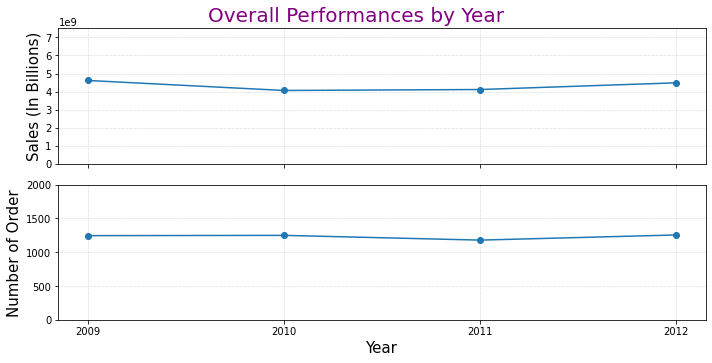

In [6]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Overall Performances by Year', x=0.5, y=1.0, fontsize=20, color='purple')
ax1.plot(performance_by_year['year'], performance_by_year['sales'], marker='o')
ax2.plot(performance_by_year['year'], performance_by_year['number_of_order'], marker='o')
ax1.set_ylabel('Sales (In Billions)', fontsize=15)
ax2.set_ylabel('Number of Order', fontsize=15)
ax1.set_ylim([0, 7500000000])
ax2.set_ylim([0, 2000])
ax1.grid(color='darkgray', linestyle=':', linewidth=0.5)
ax2.grid(color='darkgray', linestyle=':', linewidth=0.5)
ax1.set_yticks(np.arange(0, 7500000000, 1000000000))
plt.xlabel('Year', fontsize=15)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Overall, the total sales and the number of orders tends to stagnant from year to year. No significant growth has occurred. We have to do an analysis with another approach to find out the causes.

## **Overall Performance by Product Sub Category**

The results we got earlier can be broken down to more detailed level. For example, by looking at the overall performance of each sub-category. So that we can find out which sub-category sales have experienced a significant increase or even decreased.

In [7]:
performance_by_subcategory =  df[
                                (df['order_status']=='Order Finished') &
                                (df['year'].isin(['2011','2012']))
                              ].groupby(
                                ['year','product_sub_category']
                              ).agg(
                                sales=pd.NamedAgg(column='sales', aggfunc='sum')
                              ).sort_values(
                                ['year','sales'],
                                ascending = [True, False]
                              ).reset_index()
performance_by_subcategory

,year,product_sub_category,sales
0,2011,Chairs & Chairmats,622962720
1,2011,Office Machines,545856280
2,2011,Tables,505875008
3,2011,Copiers & Fax,404074080
4,2011,Telephones & Communication,392194658
5,2011,Binders & Binder Accessories,298023200
6,2011,Storage & Organization,285991820
7,2011,Appliances,272630020
8,2011,Computer Peripherals,232677960
9,2011,Bookcases,169304620


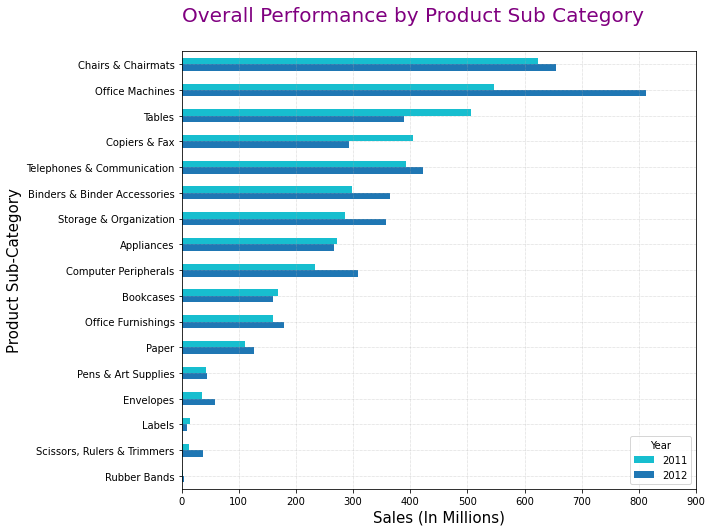

In [8]:
data = performance_by_subcategory.set_index(['product_sub_category','year']).sales
data.unstack()[['2012','2011']].sort_values(by='2011', ascending=True).plot(kind='barh', cmap='tab10')
plt.title('Overall Performance by Product Sub Category', loc='left', pad=30, fontsize=20, color='purple')
plt.xlabel('Sales (In Millions)', fontsize=15)
plt.ylabel('Product Sub-Category', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Year')
plt.gcf().set_size_inches(10, 7.5)
plt.tight_layout()
plt.show()

The results show that there are several sub-categories that experienced an increase in sales from the previous year. But there are also many sub-categories that experienced a decrease sales. It causes overall performance are remain stagnant from year to year.

# **DQLAB STORE PROMOTION EFFECTIVENESS AND EFFICIENCY**

---



DQLab store also provides a number of discounts to attract buyers. But we also have to calculate how effective and efficient the discounts we provide whether they can increase our sales or not. The effectiveness and efficiency of the promotions will be analyzed based on the Burn Rate, by comparing the total value of the promotions issued to the total sales obtained. DQLab expects the burn rate to remain at a maximum of 4.5%

**Formula for burn rate: (total discount / total sales) * 100**

### **Promotion Effectiveness and Efficiency by Years**

It's necessary to know the company's burn rate percentage from year to year. We have to show total sales and promotion value from 2009 to 2012 then calculate the burn rate percentage.

In [9]:
burn_rate_by_year = df[
                      (df['order_status']=='Order Finished')
                    ].groupby(
                      ['year']
                    ).agg(
                      sales=pd.NamedAgg(column='sales', aggfunc='sum'),
                      promotion_value=pd.NamedAgg(column='discount_value', aggfunc='sum')
                    ).reset_index()
burn_rate_by_year['burn_rate_percentage'] = (burn_rate_by_year['promotion_value']/burn_rate_by_year['sales']*100).round(2)
burn_rate_by_year

,year,sales,promotion_value,burn_rate_percentage
0,2009,4613872681,214330327,4.65
1,2010,4059100607,197506939,4.87
2,2011,4112036186,214611556,5.22
3,2012,4482983158,225867642,5.04


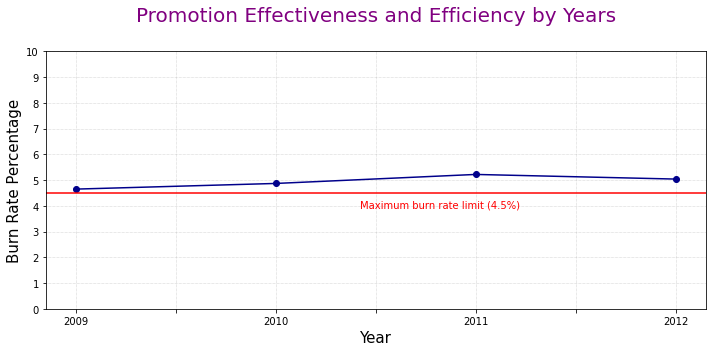

In [10]:
data = burn_rate_by_year.set_index(['year']).burn_rate_percentage.plot(color='darkblue', marker='o')
plt.title('Promotion Effectiveness and Efficiency by Years', loc='center', pad=30, fontsize=20, color='purple')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Burn Rate Percentage', fontsize=15)
plt.yticks(np.arange(0, 11, 1))
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0, ymax=10)
plt.axhline(y=4.5, color='r', linestyle='-')
plt.text(0.5, 0.4, 'Maximum burn rate limit (4.5%)', transform=fig.transFigure, color='red')
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

From the results obtained, it can be seen that the burn rate percentage from 2009 to 2012 was always above the maximum limit (>4.5%). It means that the promotions or discounts we provide are still not effective or efficient. Too much budget was spent on providing promotions but failing to increase sales.

### **Promotion Effectiveness and Efficiency by Product Sub Category**

In this section, we will analyze the effectiveness and efficiency of the promotions on 2012. We will break down the burn rate percentage for each sub-category to find out which the promotion scheme of sub-category that should be improve.

In [11]:
burn_rate_by_subcategory =  df[
                              (df['order_status']=='Order Finished') &
                              (df['year']=='2012')
                            ].groupby(
                              ['year','product_sub_category','product_category']
                            ).agg(
                              sales=pd.NamedAgg(column='sales', aggfunc='sum'),
                              promotion_value=pd.NamedAgg(column='discount_value', aggfunc='sum')
                            ).sort_values(
                              'sales',
                              ascending = False
                            ).reset_index()
burn_rate_by_subcategory['burn_rate_percentage'] = (burn_rate_by_subcategory['promotion_value']/burn_rate_by_subcategory['sales']*100).round(2)
burn_rate_by_subcategory

,year,product_sub_category,product_category,sales,promotion_value,burn_rate_percentage
0,2012,Office Machines,Technology,811427140,46616695,5.75
1,2012,Chairs & Chairmats,Furniture,654168740,26623882,4.07
2,2012,Telephones & Communication,Technology,422287514,18800188,4.45
3,2012,Tables,Furniture,388993784,16348689,4.20
4,2012,Binders & Binder Accessories,Office Supplies,363879200,22338980,6.14
5,2012,Storage & Organization,Office Supplies,356714140,18802166,5.27
6,2012,Computer Peripherals,Technology,308014340,15333293,4.98
7,2012,Copiers & Fax,Technology,292489800,14530870,4.97
8,2012,Appliances,Office Supplies,266131100,14393300,5.41
9,2012,Office Furnishings,Furniture,178927480,8233849,4.60


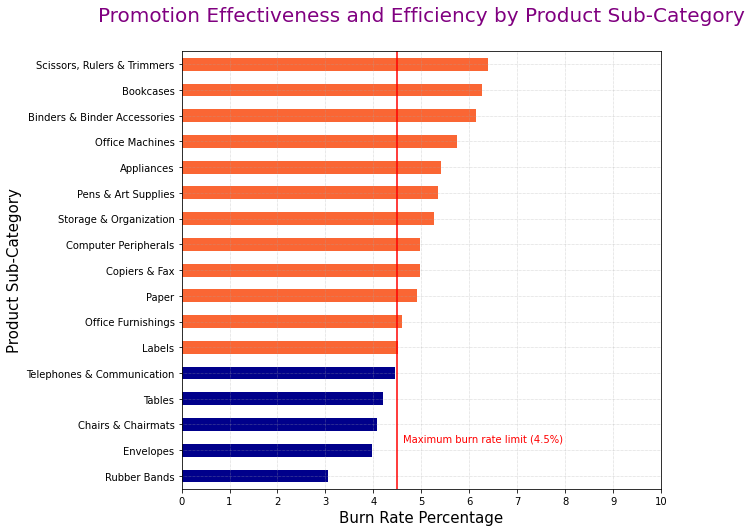

In [12]:
data = burn_rate_by_subcategory.set_index(['product_sub_category']).burn_rate_percentage.sort_values()
colors = []
for value in data.iloc:
    if value < 4.5:
        colors.append('darkblue')
    else:
        colors.append('#FA6634')
data.plot(kind='barh', color=colors)
plt.title('Promotion Effectiveness and Efficiency by Product Sub-Category', loc='center', pad=30, fontsize=20, color='purple')
plt.xlabel('Burn Rate Percentage', fontsize=15)
plt.ylabel('Product Sub-Category', fontsize=15)
plt.xlim(xmin=0,xmax=10)
plt.xticks(np.arange(0, 11, 1))
plt.axvline(x=4.5, color='r', linestyle='-')
plt.text(0.56, 0.25, 'Maximum burn rate limit (4.5%)', transform=fig.transFigure, color='red')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.gcf().set_size_inches(10, 7.5)
plt.tight_layout()
plt.show()

Despite there are already several sub-categories that have a burn rate below the maximum limit, some of sub-categories have a high burn rate percentage yet. Companies must fix the promotion of these products so that the discounts given are not useless.

# **CUSTOMER ANALYTICS**

---



### **Customers Transactions per Year**

This is done to calculate the increase of the number of customers during 2009-2012. So we can see how many new customers we have got.

In [13]:
customer_transaction_by_year =  df[
                                  (df['order_status']=='Order Finished')
                                ].groupby(
                                  'year'
                                ).agg(
                                  number_of_customer=pd.NamedAgg(column='customer', aggfunc='nunique')
                                ).reset_index()
customer_transaction_by_year

,year,number_of_customer
0,2009,585
1,2010,593
2,2011,581
3,2012,594


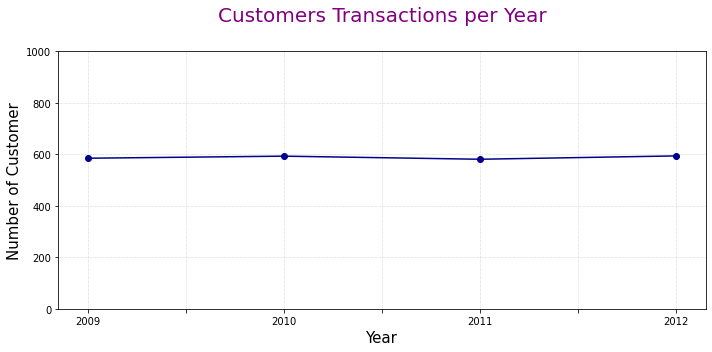

In [14]:
data = customer_transaction_by_year.set_index(['year']).number_of_customer.plot(marker='o',color='darkblue')
plt.title('Customers Transactions per Year', loc='center', pad=30, fontsize=20, color='purple')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Customer', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0, ymax=1000)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

The results show that the number of customers tends to be stagnant from year to year. Maybe this is also the causes of the company's sales didn't increase, because the same customers will buy the same products. So it's likely that there will be fewer other products to sell because they haven't found the right new customer segment.

# **CONCLUSION**

---



The sales performances of DQLab Store are still not good. The overall burn rate is also bad, because the value is above the maximum limit. The marketing team must immediately take action to increase sales, but still have to pay attention to the promotions or discounts given. Moreover, the marketing team must also be able to find new customers so that the goods that have a low sales can have a new market segment.